In [1]:
import numpy as np

import matplotlib.pyplot as plt

from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from LIMxCMBL.kernels import *

from tqdm import tqdm

# CCAT-prime
zmin = 3.5
zmax = 8.1
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

Lambdas = np.logspace(-5, -1, 25)
Lambda = Lambdas[18]

In [2]:
print(Lambda)

0.01


In [3]:
log2 = 13

In [4]:
external_chis   = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), 2**log2)

In [5]:
analytical_diag = np.real(eLOeLO_diag_numpy(a = chimin, 
                                            b = chimax, 
                                            x = external_chis, 
                                            L = Lambda))

In [6]:
_chi  = external_chis.reshape(-1, 1)
_chip = external_chis.reshape(1, -1)


In [7]:
analytical_eLOeLO = eLOeLO_off_diag_numpy(L = Lambda, 
                                          a = chimin, 
                                          b = chimax, 
                                          x = _chi, 
                                          xp = _chip)
#set the diagonal to the correct quantity
np.fill_diagonal(analytical_eLOeLO, analytical_diag)

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/2*(2*L*a*b*x**2*xp*cos(L*(x + xp))*Si(2*L*a) - 2*L*a*b*x**2*xp*cos(L*(x + xp))*Si(2*L*b) - 2*L*a*b*x*xp**2*cos(L*(x + xp))*Si(2*L*a) + 2*L*a*b*x*xp**2*cos(L*(x + xp))*Si(2*L*b) + a*b*x**2*log(a)*cos(L*(x - xp)) - a*b*x**2*log(b)*cos(L*(x - xp)) - a*b*x**2*log(-a + xp)*cos(L*(x - xp)) + a*b*x**2*log(b - xp)*cos(L*(x - xp)) + a*b*x**2*sin(L*(x - xp))*Si(2*L*(a - xp)) - a*b*x**2*sin(L*(x - xp))*Si(2*L*(b - xp)) - a*b*x**2*sin(L*(x + xp))*Si(2*L*a) + a*b*x**2*sin(L*(x + xp))*Si(2*L*b) + a*b*x**2*cos(L*(x - xp))*Ci(2*L*(a - xp)) - a*b*x**2*cos(L*(x - xp))*Ci(2*L*(b - xp)) - 1j*pi*a*b*x**2*cos(L*(x - xp)) - a*b*xp**2*log(a)*cos(L*(x - xp)) + a*b*xp**2*log(b)*cos(L*(x - xp)) + a*b*xp**2*log(-a + x)*cos(L*(x - xp)) - a*b*xp**2*log(b - x)*cos(L*(x - xp)) + a*b*xp**2*sin(L*(x - xp))*Si(2*L*(a - x)) + a*b*xp**2*sin(L*(x - xp))*Si(2*L*(-b + x)) + a*b*xp**2*sin(L*(x + xp))*Si(2*L*a) - a*b*xp**2*sin(L*(x + xp))

In [8]:
vb = np.max(np.abs(analytical_eLOeLO))

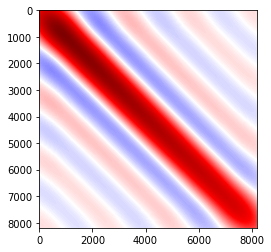

In [9]:
plt.imshow(np.real(analytical_eLOeLO), vmin = -vb, vmax = vb, cmap = 'seismic')

In [10]:
dchi = np.mean(np.diff(external_chis))

In [11]:
f_eIeI(external_chis, dchi = dchi, Lambda = Lambda)

array([7.64453438e-08, 7.64394217e-08, 7.64335002e-08, ...,
       4.40593376e-08, 4.40567464e-08, 4.40541553e-08])

In [12]:
f_cross(chi = _chi,
       chip = _chip,
       Lambda = Lambda)

array([[ 1.31279128e-10,  1.31273884e-10,  1.31268322e-10, ...,
        -4.62196564e-13, -4.74700389e-13, -4.87197167e-13],
       [ 1.31273884e-10,  1.31268958e-10,  1.31263714e-10, ...,
        -4.49654011e-13, -4.62163910e-13, -4.74666852e-13],
       [ 1.31268322e-10,  1.31263714e-10,  1.31258789e-10, ...,
        -4.37106362e-13, -4.49622245e-13, -4.62131261e-13],
       ...,
       [-4.62196564e-13, -4.49654011e-13, -4.37106362e-13, ...,
         7.56628349e-11,  7.56605181e-11,  7.56580180e-11],
       [-4.74700389e-13, -4.62163910e-13, -4.49622245e-13, ...,
         7.56605181e-11,  7.56583849e-11,  7.56560683e-11],
       [-4.87197167e-13, -4.74666852e-13, -4.62131261e-13, ...,
         7.56580180e-11,  7.56560683e-11,  7.56539353e-11]])